# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'cffec7e04a0433ade332112f1281f1d9'

### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | nikol'sk
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | trairi
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | wakkanai
Processing Record 10 of Set 1 | suva
Processing Record 11 of Set 1 | howrah
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | lazaro cardenas
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | labuan
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | zhijiang
Processing Record 20 of Set 1 | chipinge
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | ilulissat
Processing Record 23 of Set 1 | aitape
Processing Rec

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ust-nera,64.5667,143.2000,1.23,82,91,1.41,RU,1714866765
1,adamstown,-25.0660,-130.1015,21.19,65,20,8.78,PN,1714866757
2,grytviken,-54.2811,-36.5092,0.24,78,16,5.03,GS,1714866959
3,west island,-12.1568,96.8225,27.99,78,100,7.72,CC,1714866761
4,nikol'sk,53.7189,46.0712,0.46,71,41,3.19,RU,1714867012


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,1.23,82,91,1.41,RU,1714866765
1,adamstown,-25.0660,-130.1015,21.19,65,20,8.78,PN,1714866757
2,grytviken,-54.2811,-36.5092,0.24,78,16,5.03,GS,1714866959
3,west island,-12.1568,96.8225,27.99,78,100,7.72,CC,1714866761
4,nikol'sk,53.7189,46.0712,0.46,71,41,3.19,RU,1714867012


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

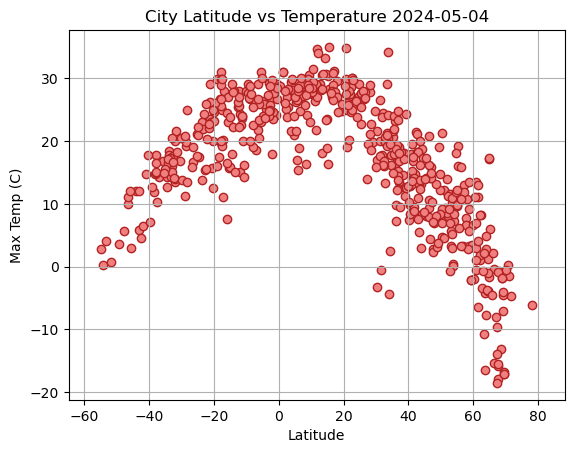

In [91]:
# Build scatter plot for latitude vs. temperature
x_axis_lat = city_data_df['Lat']
y_axis_temp = city_data_df['Max Temp']

plt.scatter(x_axis_lat,y_axis_temp, 
            marker="o", 
            facecolors="lightcoral",
            edgecolors='firebrick')

# minimum and maximum latitude values, plus a buffer of 10
plt.xlim(min(x_axis_lat) - 10, max(x_axis_lat) + 10)

# Incorporate the other graph properties
plt.title('City Latitude vs Temperature 2024-05-04')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [87]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

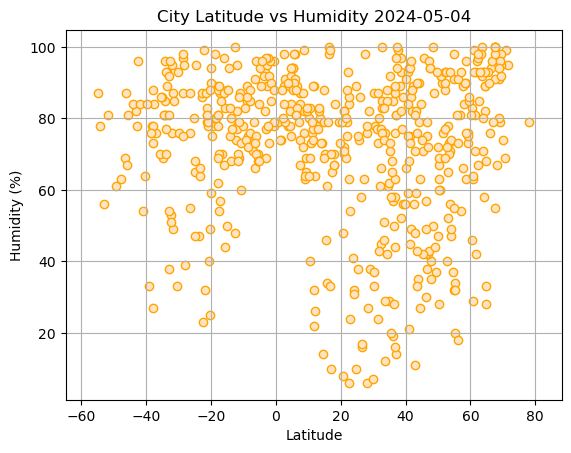

In [88]:
# Build the scatter plots for latitude vs. humidity
x_axis_lat = city_data_df['Lat']
y_axis_humidity = city_data_df['Humidity']

plt.scatter(x_axis_lat,y_axis_humidity, 
            marker="o", 
            facecolors="bisque",
            edgecolors='orange')

# minimum and maximum latitude values, plus a buffer of 10
plt.xlim(min(x_axis_lat) - 10, max(x_axis_lat) + 10)

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity 2024-05-04')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

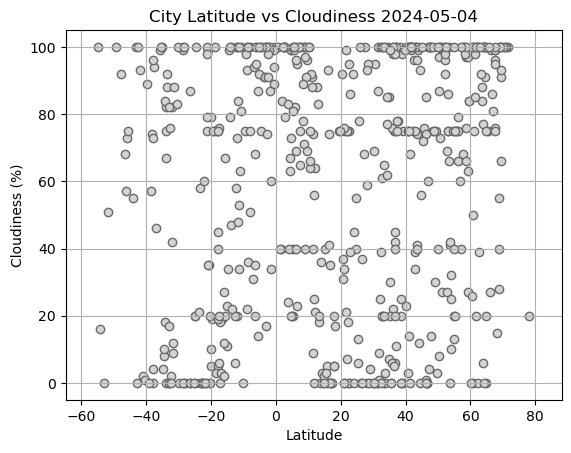

In [90]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_lat = city_data_df['Lat']
y_axis_clouds = city_data_df['Cloudiness']

plt.scatter(x_axis_lat,y_axis_clouds, 
            marker="o", 
            facecolors="lightgrey",
            edgecolors='dimgrey')

# minimum and maximum latitude values, plus a buffer of 10
plt.xlim(min(x_axis_lat) - 10, max(x_axis_lat) + 10)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness 2024-05-04')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

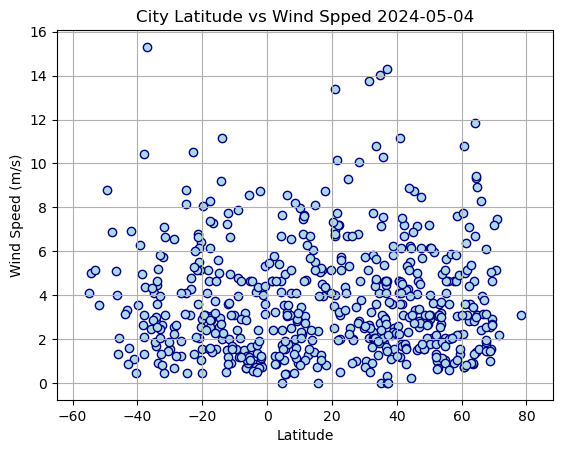

In [92]:
# Build the scatter plots for latitude vs. Wind Speed
x_axis_lat = city_data_df['Lat']
y_axis_wind = city_data_df['Wind Speed']

plt.scatter(x_axis_lat,y_axis_wind, 
            marker="o", 
            facecolors="lightblue",
            edgecolors='navy')

# minimum and maximum latitude values, plus a buffer of 10
plt.xlim(min(x_axis_lat) - 10, max(x_axis_lat) + 10)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Spped 2024-05-04')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_data, y_data, x_label='', y_label='', title=''):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot scatter plot
    plt.scatter(x_data, y_data, marker='o', facecolors='blue', edgecolors='black')

    # Plot regression line
    plt.plot(x_data, regress_values, "r-", label=line_eq)
    #plt.annotate(line_eq, (x_data[0], y_data[0]), fontsize=12, color="red")
                  
    # Title, labels, and aesthetics
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
    plt.legend(loc='best')

    # Show plot
    print(f"The r-value is= {r_value:.2f}")
    plt.show()

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ust-nera,64.5667,143.2000,1.23,82,91,1.41,RU,1714866765
4,nikol'sk,53.7189,46.0712,0.46,71,41,3.19,RU,1714867012
7,tiksi,71.6872,128.8694,-4.64,95,100,2.18,RU,1714866958
8,wakkanai,45.4094,141.6739,7.99,71,75,8.75,JP,1714866978
10,howrah,22.5892,88.3103,30.00,84,75,3.09,IN,1714866902


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.19,65,20,8.78,PN,1714866757
2,grytviken,-54.2811,-36.5092,0.24,78,16,5.03,GS,1714866959
3,west island,-12.1568,96.8225,27.99,78,100,7.72,CC,1714866761
5,uturoa,-16.7333,-151.4333,27.91,70,19,7.27,PF,1714866990
6,trairi,-3.2778,-39.2689,25.15,93,100,4.15,BR,1714867266


###  Temperature vs. Latitude Linear Regression Plot

The r-value is= -0.85


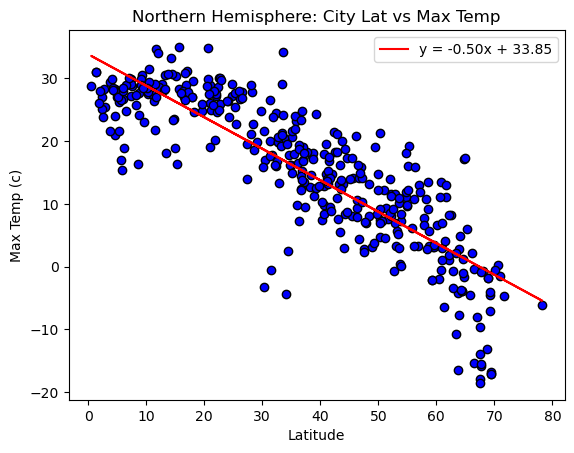

In [142]:
#Variables
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']

#Call def function
plot_linear_regression(x_data, y_data,
                       x_label='Latitude',
                       y_label='Max Temp (c)',
                       title='Northern Hemisphere: City Lat vs Max Temp')
                      




The r-value is: 0.7161472181434118


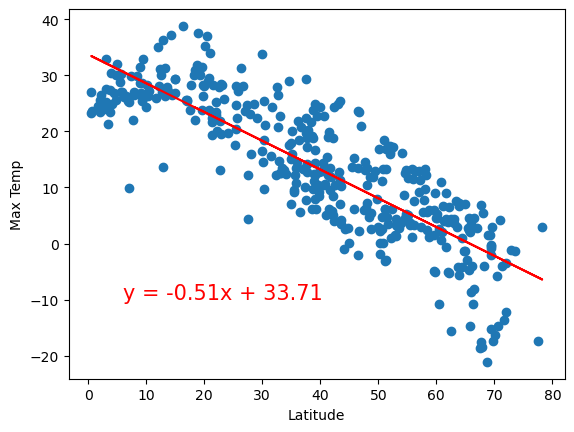

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


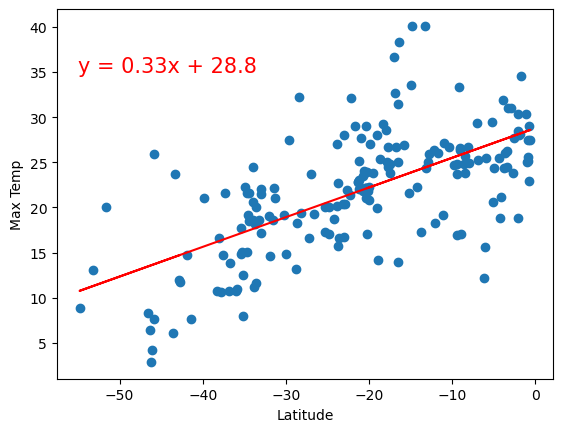

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


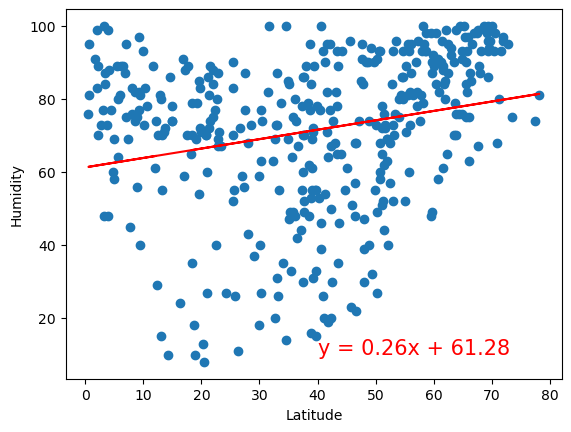

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


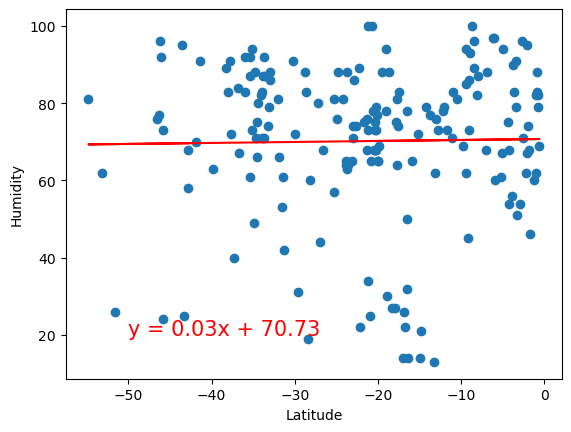

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


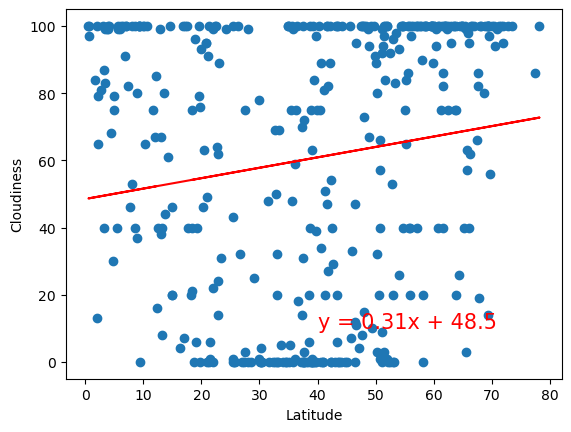

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


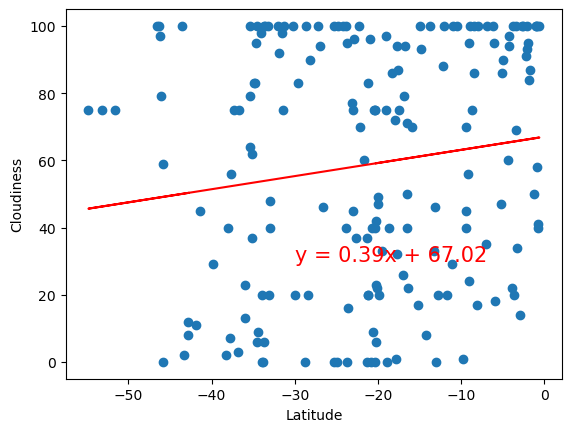

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


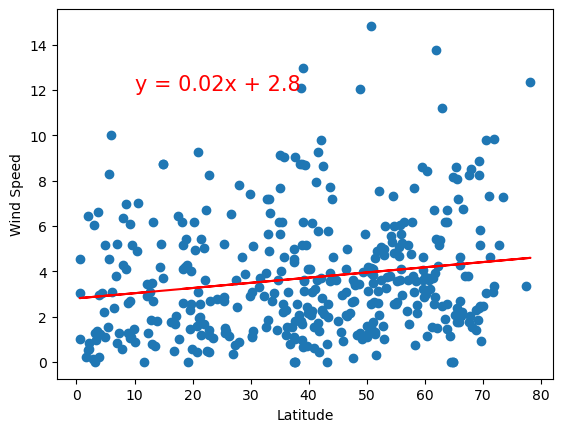

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


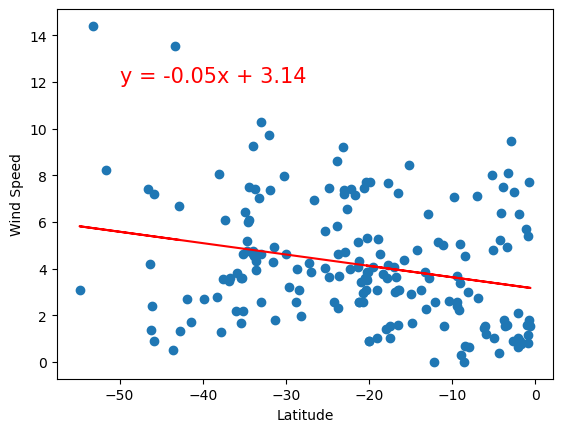

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE